In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
aadr = pd.read_csv('~/Documents/Training/Python For Data Analysis/5min data/5 min/us/nyse etfs/aadr.us.txt',
                  parse_dates=True, index_col=0)
aadr.head()

,Time,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,,
2014-06-24,16:25:00,38.587,38.587,38.548,38.548,403,0
2014-06-24,16:50:00,38.577,38.577,38.577,38.577,403,0
2014-06-24,17:25:00,38.558,38.558,38.449,38.469,949,0
2014-06-24,17:50:00,38.498,38.498,38.498,38.498,202,0
2014-06-24,17:55:00,38.508,38.548,38.498,38.538,1714,0


In [5]:
vwap = (aadr.Close * aadr.Volume).sum() / aadr.Volume.sum()
vwap

38.0329920792959

In [6]:
ts1 = Series(np.random.randn(3),
             index=pd.date_range('2012-6-13', periods=3, freq='W-WED'))
ts1

2012-06-13    0.063169
2012-06-20    0.530955
2012-06-27    0.770580
Freq: W-WED, dtype: float64

In [7]:
ts1.resample('B')

2012-06-13    0.063169
2012-06-14         NaN
2012-06-15         NaN
2012-06-18         NaN
2012-06-19         NaN
2012-06-20    0.530955
2012-06-21         NaN
2012-06-22         NaN
2012-06-25         NaN
2012-06-26         NaN
2012-06-27    0.770580
Freq: B, dtype: float64

In [8]:
ts2 = Series(np.random.randn(6),
             index=pd.DatetimeIndex(['2012-6-12', '2012-6-17', '2012-6-18',
                                     '2012-6-21', '2012-6-22', '2012-6-29']))
ts1.reindex(ts2.index, method='ffill')

2012-06-12         NaN
2012-06-17    0.063169
2012-06-18    0.063169
2012-06-21    0.530955
2012-06-22    0.530955
2012-06-29    0.770580
dtype: float64

In [9]:
gdp = Series(np.random.randn(7),
             index = pd.period_range('1984Q2', periods=7, freq='Q-SEP'))
infl = Series([.025, .045, .037, .04],
              index = pd.period_range('1982', periods=4, freq='A-DEC'))

print(gdp, infl)

(1984Q2   -0.982740
1984Q3    0.183495
1984Q4   -0.819509
1985Q1    0.270834
1985Q2   -1.681666
1985Q3    1.633120
1985Q4    0.578574
Freq: Q-SEP, dtype: float64, 1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64)


In [10]:
infl_q = infl.asfreq('Q-SEP', how='end')
infl_q.reindex(gdp.index, method='ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

In [11]:
rng = pd.date_range('2012-06-01 9:30', '2012-06-01 15:59', freq='T')
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1,4)])

ts = Series(np.arange(len(rng), dtype=float), index=rng)
ts.head()

2012-06-01 09:30:00    0
2012-06-01 09:31:00    1
2012-06-01 09:32:00    2
2012-06-01 09:33:00    3
2012-06-01 09:34:00    4
dtype: float64

In [12]:
from datetime import time

ts[time(10,0)]

2012-06-01 10:00:00      30
2012-06-04 10:00:00     420
2012-06-05 10:00:00     810
2012-06-06 10:00:00    1200
dtype: float64

In [13]:
#last reported prices up to some boundary...
indexer = np.sort(np.random.permutation(len(ts))[700:])
irr_ts = ts.copy()
irr_ts[indexer] = np.nan

irr_ts['2012-06-01 09:50' : '2012-06-01 10:00']

2012-06-01 09:50:00   NaN
2012-06-01 09:51:00    21
2012-06-01 09:52:00    22
2012-06-01 09:53:00   NaN
2012-06-01 09:54:00    24
2012-06-01 09:55:00    25
2012-06-01 09:56:00    26
2012-06-01 09:57:00   NaN
2012-06-01 09:58:00   NaN
2012-06-01 09:59:00    29
2012-06-01 10:00:00   NaN
dtype: float64

In [14]:
selection = pd.date_range('2012-06-01 10:00', periods=4, freq='B')
irr_ts.asof(selection)

2012-06-01 10:00:00      29
2012-06-04 10:00:00     419
2012-06-05 10:00:00     807
2012-06-06 10:00:00    1200
Freq: B, dtype: float64

In [15]:
data1 = DataFrame(np.ones((6,3), dtype=float),
                   columns=['a', 'b', 'c'],
                   index=pd.date_range('6/12/2012', periods=6))

data2 = DataFrame(np.ones((6,3), dtype=float) * 2,
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('6/13/2012', periods=6))

data1.head()

,a,b,c
2012-06-12,1,1,1
2012-06-13,1,1,1
2012-06-14,1,1,1
2012-06-15,1,1,1
2012-06-16,1,1,1


In [16]:
spliced = pd.concat([data1.ix[:'2012-06-14'], data2.ix['2012-06-15':]])
spliced

,a,b,c
2012-06-12,1,1,1
2012-06-13,1,1,1
2012-06-14,1,1,1
2012-06-15,2,2,2
2012-06-16,2,2,2
2012-06-17,2,2,2
2012-06-18,2,2,2


### 10-22-15

In [17]:
import pandas.io.data as web

price = web.get_data_yahoo('RH', '20130101')
price.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,33.799999,34.200001,33.139999,33.230000,207900,33.230000
2013-01-03,33.410000,34.490002,33.230000,34.389999,155400,34.389999
2013-01-04,34.360001,34.880001,33.680000,34.290001,231400,34.290001
2013-01-07,34.230000,35.439999,32.919998,32.970001,172300,32.970001
2013-01-08,32.849998,33.549999,31.940001,32.189999,170000,32.189999


In [18]:
price.loc['2013-10-03', 'Adj Close'] / price.loc['20130301', 'Adj Close'] - 1

0.7287006994488634

In [19]:
returns = price['Adj Close'].pct_change()
ret_index = (1+returns).cumprod(); ret_index[0] = 1
ret_index

Date
2013-01-02    1.000000
2013-01-03    1.034908
2013-01-04    1.031899
2013-01-07    0.992176
2013-01-08    0.968703
2013-01-09    0.994583
2013-01-10    0.986458
2013-01-11    0.987662
2013-01-14    0.987060
2013-01-15    0.979537
2013-01-16    0.972013
2013-01-17    1.022570
2013-01-18    1.058080
2013-01-22    1.075233
2013-01-23    1.074330
2013-01-24    1.090280
2013-01-25    1.085766
2013-01-28    1.078543
2013-01-29    1.086067
2013-01-30    1.087271
2013-01-31    1.083358
2013-02-01    1.090280
2013-02-04    1.095095
2013-02-05    1.128799
2013-02-06    1.171231
2013-02-07    1.172134
2013-02-08    1.176046
2013-02-11    1.178754
2013-02-12    1.189588
2013-02-13    1.186879
                ...   
2015-09-23    3.048751
2015-09-24    2.998796
2015-09-25    2.921156
2015-09-28    2.789949
2015-09-29    2.778212
2015-09-30    2.808005
2015-10-01    2.795968
2015-10-02    2.814024
2015-10-05    2.869094
2015-10-06    2.813121
2015-10-07    2.878724
2015-10-08    2.917244
2015-1

In [20]:
m_returns = ret_index.resample('BM', how='last').pct_change()
m_returns['2014']

Date
2014-01-31   -0.156909
2014-02-28    0.193514
2014-03-31    0.086680
2014-04-30   -0.152195
2014-05-30    0.065555
2014-06-30    0.399669
2014-07-31   -0.121010
2014-08-29    0.025431
2014-09-30   -0.051508
2014-10-31    0.009679
2014-11-28    0.051668
2014-12-31    0.136617
Freq: BM, Name: Adj Close, dtype: float64

In [21]:
# random portfolio construction and analysis...

import random; random.seed(0)
import string

N = 1000

def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in xrange(n)])

tickers = np.array([rands(5) for _ in xrange(N)])

In [22]:
M=500
df = DataFrame({'Momentum': np.random.randn(M) / 200 +.03,
                'Value': np.random.randn(M) / 200 + .08,
                'ShortInterest': np.random.randn(M) / 200 - .02,},
                index=tickers[:M])

industry_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(industry_names), N)
industries = Series(industry_names[sampler], index=tickers, name='industry')

by_industry = df.groupby(industries)
by_industry.describe()

Momentum  ShortInterest       Value
industry                                              
FINANCIAL count  260.000000     260.000000  260.000000
          mean     0.030110      -0.020596    0.079591
          std      0.005108       0.004875    0.005000
          min      0.012838      -0.033282    0.066728
          25%      0.027155      -0.023809    0.075716
          50%      0.030155      -0.020421    0.079548
          75%      0.032983      -0.017316    0.083114
          max      0.044590      -0.001983    0.093036
TECH      count  240.000000     240.000000  240.000000
          mean     0.029644      -0.019792    0.080187
          std      0.004785       0.005229    0.005262
          min      0.016124      -0.038178    0.062489
          25%      0.026154      -0.022796    0.076684
          50%      0.029742      -0.019716    0.079786
          75%      0.032432      -0.016317    0.083419
          max      0.042533      -0.004601    0.096364

In [23]:
def zscore(group):
    return (group - group.mean()) / group.std()

df_stand = by_industry.apply(zscore)

df_stand.head()

,Momentum,ShortInterest,Value
VTKGN,0.015996,0.780923,1.479312
KUHMP,0.792130,-0.702819,1.528990
XNHTQ,1.097234,0.311306,-0.679479
GXZVX,-0.298417,-0.098052,1.082691
ISXRM,0.186279,1.224383,-0.337701


In [24]:
#check that groups have been normalized as expected...
df_stand.groupby(industries).agg(['mean', 'std'])

Momentum     ShortInterest             Value    
                   mean std          mean std          mean std
industry                                                       
FINANCIAL -1.972781e-15   1 -2.878040e-16   1  4.696243e-15   1
TECH       7.577272e-16   1 -2.110812e-15   1  1.667740e-14   1

In [25]:
ind_rank = by_industry.rank(ascending=False)
ind_rank.groupby(industries).agg(['min', 'max'])

Momentum      ShortInterest      Value     
               min  max           min  max   min  max
industry                                             
FINANCIAL        1  260             1  260     1  260
TECH             1  240             1  240     1  240

In [26]:
from numpy.random import rand

fac1, fac2, fac3 = rand(3, 1000)

ticker_subset = tickers.take(np.random.permutation(N)[:1000])

port = Series(.7*fac1 - 1.2*fac2 + .3*fac3 + rand(1000), index=ticker_subset)
factors = DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3}, index=ticker_subset)

factors.corrwith(port)

f1    0.421908
f2   -0.682415
f3    0.166698
dtype: float64

In [27]:
pd.ols(y=port, x=factors).beta

f1           0.736637
f2          -1.227447
f3           0.289615
intercept    0.506998
dtype: float64

In [28]:
def beta_exposure(chunk, factors=None):
    return pd.ols(y=chunk, x=factors).beta

by_ind = port.groupby(industries)
exposures = by_ind.apply(beta_exposure, factors=factors)
exposures.unstack()

,f1,f2,f3,intercept
industry,,,,
FINANCIAL,0.757627,-1.198895,0.301736,0.481732
TECH,0.711002,-1.260027,0.283412,0.531804


In [29]:
data = web.get_data_yahoo('SPY', '2010-01-01')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1470 entries, 2010-01-04 to 2015-11-03
Data columns (total 6 columns):
Open         1470 non-null float64
High         1470 non-null float64
Low          1470 non-null float64
Close        1470 non-null float64
Volume       1470 non-null int64
Adj Close    1470 non-null float64
dtypes: float64(5), int64(1)
memory usage: 80.4 KB


In [30]:
px = data['Adj Close']
returns = px.pct_change()

def to_index(rets):
    index = (1+rets).cumprod()
    first_loc = max(index.index.get_loc(index.idxmax()) - 1, 0)
    index.values[first_loc] = 1
    return index

def trend_signal(rets, lookback, lag):
    signal = pd.rolling_sum(rets, lookback, min_periods=lookback - 5)
    return signal.shift(lag)

signal = trend_signal(returns, 100, 3)
trade_friday = signal.resample('W-FRI').resample('B', fill_method='ffill')
trade_rets = trade_friday.shift(1) * returns
trade_rets = trade_rets[:len(returns)]

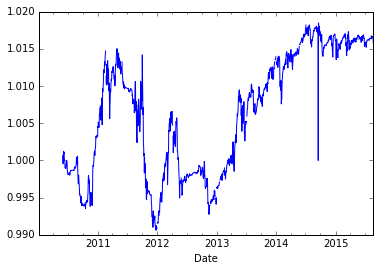

In [31]:
to_index(trade_rets).plot()

In [32]:
vol = pd.rolling_std(returns, 250, min_periods=200) * np.sqrt(250)

def sharpe(rets, ann=250):
    return rets.mean() / rets.std() * np.sqrt(ann)

trade_rets.groupby(pd.qcut(vol, 4)).agg(sharpe)

[0.0998, 0.115]   -0.165986
(0.115, 0.128]     1.148638
(0.128, 0.18]      0.836280
(0.18, 0.232]     -0.114015
dtype: float64

### Signal Frontier Analysis

In [34]:
names = ['AAPL', 'GOOGL', 'MSFT', 'DELL', 'GS', 'MS', 'BAC', 'C']

def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']

px = DataFrame({n: get_px(n, '1/1/2009', '6/1/2012') for n in names})
px.head()

,AAPL,BAC,C,DELL,GOOGL,GS,MS,MSFT
Date,,,,,,,,
2009-01-02,12.122906,13.809441,70.755849,10.39902,160.820818,79.644527,15.632794,17.068378
2009-01-05,12.634540,13.472155,70.161264,10.26359,164.189196,81.498857,16.212469,17.227896
2009-01-06,12.426146,13.761257,73.926976,10.68922,167.197207,81.434599,18.015898,17.429391
2009-01-07,12.157638,13.211963,70.854945,10.78596,161.166170,77.569875,16.654125,16.379934
2009-01-08,12.383398,13.048139,70.954042,10.90204,162.757769,78.405247,17.316609,16.892070


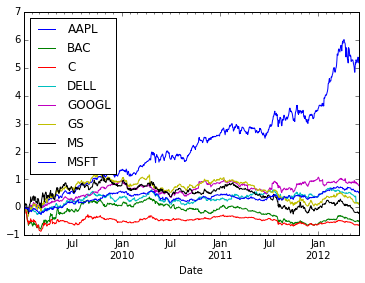

In [35]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()

((1+rets).cumprod()-1).plot();

In [38]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return  demeaned.divide(demeaned.std(axis=1), axis=0)

compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    '''Calculates the Sharpe Ratio'''
    # compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)
    
    daily_rets = prices.pct_change()
    
    # compute portfolio returns
    port = port.shift(1).resample(freq, how='first')
    returns = daily_rets.resample(freq, how=compound)
    port_rets = (port*returns).sum(axis=1)
    
    return daily_sr(port_rets) * np.sqrt(252/hold)

In [39]:
strat_sr(px, 70, 30)

0.30444744900634063

In [41]:
# now grid search across parameters for optimal Sharpe Ratio...

from collections import defaultdict

lookbacks = range(20,90,5)
holdings = range(20,90,5)
dd = defaultdict(dict)

for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

ddf.head()

Lookback Period,20,25,30,35,40,45,50,55,60,65,70,75,80,85
Holding Period,,,,,,,,,,,,,,
20,-0.562695,-0.299210,-0.271974,-0.418584,-0.032874,-0.592000,-0.005617,0.021158,-0.035753,-0.098562,-0.212870,0.037690,0.127729,-0.036643
25,-0.049578,-0.031337,0.334114,0.436281,0.106439,0.099840,0.321668,0.390807,0.200173,0.267779,0.209050,-0.249999,-0.258210,-0.281511
30,-0.557074,-0.625025,-0.307921,-0.233986,-0.186913,-0.235558,0.035855,0.016800,0.178851,0.296990,0.304447,0.388458,0.197451,0.089610
35,-0.042264,0.097554,0.029138,0.503971,0.181438,0.150815,0.073701,0.376385,0.505850,0.496068,0.045812,-0.191286,-0.053674,0.027425
40,-0.215389,-0.189692,-0.229553,-0.264460,0.103415,-0.072264,-0.082617,0.093904,0.180388,0.091423,-0.128584,-0.178399,-0.127264,-0.040381


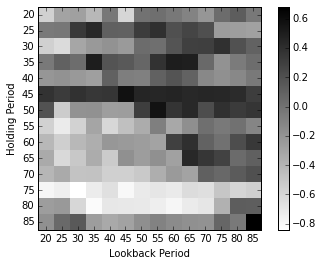

In [46]:
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)
    
heatmap(ddf)

### Future Contract Rolling

In [47]:
# use SPY as a proxy...
import pandas.io.data as web

px = web.get_data_yahoo('SPY')['Adj Close'] * 10
px.head()

Date
2010-01-04    1009.20266
2010-01-05    1011.87412
2010-01-06    1012.58654
2010-01-07    1016.86096
2010-01-08    1020.24483
Name: Adj Close, dtype: float64

In [48]:
# create two contract exp dates...
from datetime import datetime

expiry = {'ESU2' : datetime(2012,9,21), 'EZ2': datetime(2012,12,21)}
expiry = Series(expiry).order()
expiry

ESU2   2012-09-21
EZ2    2012-12-21
dtype: datetime64[ns]

In [51]:
# make the proxies differ by random amts...
np.random.seed(12347)
N = 200
walk = (np.random.randint(0,200,size=N) - 100) * .25
perturb = (np.random.randint(0,20,size=N) - 10) * .25
walk = walk.cumsum()

rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B')
near = np.concatenate([px.values, px.values[-1] + walk])
far = np.concatenate([px.values, px.values[-1] + walk + perturb])
prices = DataFrame({'ESU2': near, 'ESZ2': far}, index=rng)

prices.tail()

In [53]:
# splice the series by linear-decay weightings:

def get_roll_weights(start, expiry, items, roll_periods=5):
    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = DataFrame(np.zeros((len(dates), len(items))), index=dates, columns=items)

    prev_date = weights.index[0]
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            weights.ix[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                     periods=roll_periods+1, freq='B')
            decay_weights = np.linspace(0,1,roll_periods+1)
            weights.ix[roll_rng, item] = 1 - decay_weights
            weights.ix[roll_rng, expiry.index[i+1]] = decay_weights
        else:
            weights.ix[prev_date:,item] = 1
            
        prev_date = ex_date
    
    return weights

weights = get_roll_weights('6/1/2012', expiry, prices.columns)

weights.ix['2012-09-12':'2012-09-21']

,ESU2,ESZ2,EZ2
2012-09-12,1.0,0,NaN
2012-09-13,1.0,0,0.0
2012-09-14,0.8,0,0.2
2012-09-17,0.6,0,0.4
2012-09-18,0.4,0,0.6
2012-09-19,0.2,0,0.8
2012-09-20,0.0,0,1.0
2012-09-21,0.0,0,1.0


In [55]:
rolled_returns = (price.pct_change() * weights).sum(1)
rolled_returns.tail()

2015-10-28    0
2015-10-29    0
2015-10-30    0
2015-11-02    0
2015-11-03    0
dtype: float64

### Rolling Correlation & Linear Regression

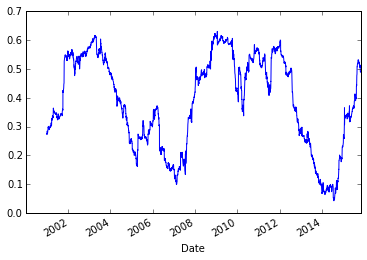

In [56]:
aapl = web.get_data_yahoo('AAPL', '2000-01-01')['Adj Close']
msft = web.get_data_yahoo('MSFT', '2000-01-01')['Adj Close']

appl_rets = aapl.pct_change()
msft_rets = msft.pct_change()

pd.rolling_corr(appl_rets, msft_rets, 250).plot()

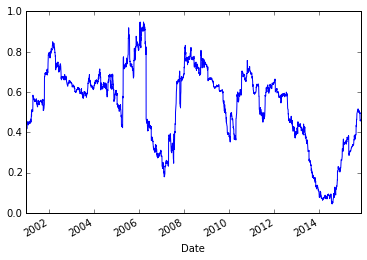

In [58]:
model = pd.ols(y=appl_rets, x={'MSFT': msft_rets}, window=250)
model.beta['MSFT'].plot()